In [1]:
import os
import torch
from tqdm import tqdm

path = '/data/qingyuyang/dta_ours/output/davis/novel_pair_fold0/revision_moe_fullemb_1d2d3d_MANnew_16_0.0001/count/d2fbd221751a0eeb9374db076db862ca_899418d99797aa41d4bc8cc50361b11e'
epoch_num = len(os.listdir(path))

indices = [100, 150, 200]

combined_weights = []
for feature_idx in indices:
    weights = []
    for i in tqdm(range(epoch_num)):
        a = torch.load(f'{path}/weight_epoch{i}.pt', weights_only=True)
        weights.append(a[feature_idx])
    combined_weights.append(weights)

100%|██████████| 117/117 [00:03<00:00, 36.59it/s]


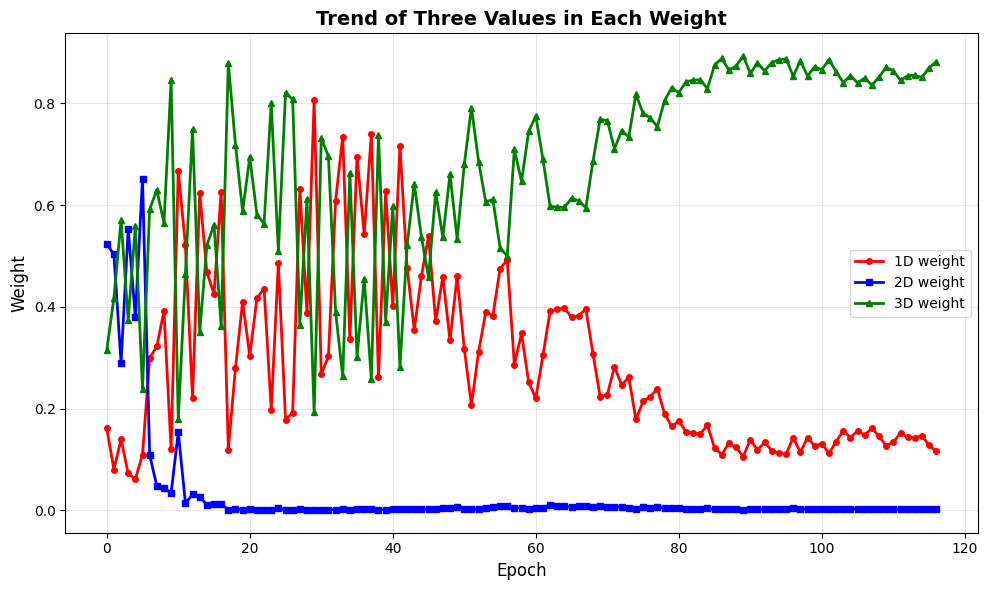

In [4]:
import matplotlib.pyplot as plt

# 2. 提取每个weight的三个数值，分别存入三个列表
x = range(len(weights[0]))  # 横坐标：列表的索引
y1 = [w[0].item() for w in weights]  # 第一条线：每个weight的第1个数值
y2 = [w[1].item() for w in weights]  # 第二条线：每个weight的第2个数值
y3 = [w[2].item() for w in weights]  # 第三条线：每个weight的第3个数值

# 3. 配置并绘制折线图
plt.figure(figsize=(10, 6))  # 设置画布大小

# 绘制三条趋势线，分别指定颜色和标签
plt.plot(x, y1, color='red', label='1D weight', linewidth=2, marker='o', markersize=4)
plt.plot(x, y2, color='blue', label='2D weight', linewidth=2, marker='s', markersize=4)
plt.plot(x, y3, color='green', label='3D weight', linewidth=2, marker='^', markersize=4)

# 添加图表元素
plt.xlabel('Epoch', fontsize=12)  # 横坐标标题
plt.ylabel('Weight', fontsize=12)  # 纵坐标标题
plt.title('Trend of Three Values in Each Weight', fontsize=14, fontweight='bold')  # 图表标题
plt.legend(fontsize=10)  # 显示图例（区分三条线）
plt.grid(True, alpha=0.3)  # 添加网格，增强可读性

# 4. 展示和保存图表
plt.tight_layout()  # 自动调整布局，避免标签被截断
plt.savefig(f'./weight_trend/weight{feature_idx}_trend.png', dpi=200)  # 可选：保存图表到本地，dpi控制清晰度
plt.show()  # 显示图表

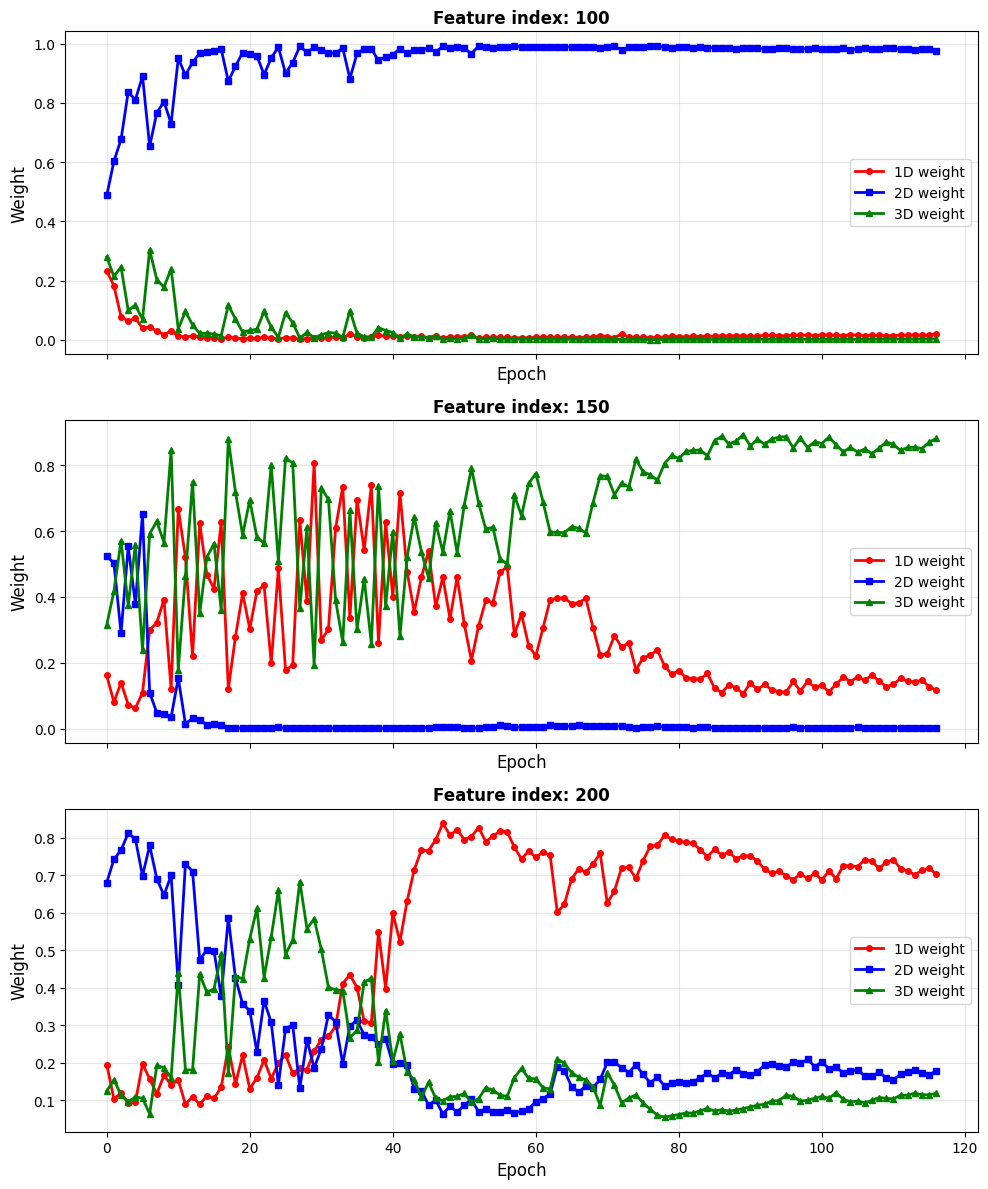

In [2]:
import matplotlib.pyplot as plt

# 1. 定义一个绘制单张权重趋势图的函数
#    这样可以避免重复代码，并使主逻辑更清晰
def plot_weight_trend(ax, weights, title_suffix):
    """
    在指定的子图(ax)上绘制权重趋势图

    参数:
    ax (matplotlib.axes.Axes): 要绘制的子图对象
    weights (list): 权重列表, 每个元素是一个包含3个数值的张量
    title_suffix (str): 图表标题的后缀，用于区分不同的子图
    """
    x = range(len(weights))
    y1 = [w[0].item() for w in weights]
    y2 = [w[1].item() for w in weights]
    y3 = [w[2].item() for w in weights]

    # 使用 ax.plot() 代替 plt.plot()
    ax.plot(x, y1, color='red', label='1D weight', linewidth=2, marker='o', markersize=4)
    ax.plot(x, y2, color='blue', label='2D weight', linewidth=2, marker='s', markersize=4)
    ax.plot(x, y3, color='green', label='3D weight', linewidth=2, marker='^', markersize=4)

    # 使用 ax.set_*() 系列函数来设置子图的属性
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Weight', fontsize=12)
    ax.set_title(f'Feature index: {title_suffix}', fontsize=12, fontweight='bold') #
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

# 2. 创建一个大图，并分成3个子图 (3行1列)
#    figsize可以根据需要调整，高度可以设置得高一些
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# sharex=True 表示三个子图共享同一个x轴，这样只有最下面的子图会显示x轴标签，使图表更整洁

# 3. 循环遍历你的权重列表和子图axes列表
#    假设你的三个权重列表存储在一个名为 weights_list 的列表中
#    例如: weights_list = [weights1, weights2, weights3]

# 这里我们使用 enumerate 来同时获取索引和值
for i, (ax, weights, idx) in enumerate(zip(axes, combined_weights, indices)):
    # 为每个子图调用绘制函数
    # 我们可以用索引i来生成每个子图的唯一标题，例如 'A', 'B', 'C' 或 '1', '2', '3'
    plot_weight_trend(ax, weights, idx) # 使用 'A', 'B', 'C' 作为后缀

# 4. 调整子图之间的间距，防止标题和标签重叠
plt.tight_layout()

# 5. 保存和显示
# 注意：保存的是整个大图
plt.savefig(f'./weight_trend/weight_combined_trend.jpg', dpi=200)
plt.show()